# **Temperature Detection Using RGB Values**

Dring this pandemic we have seen Human Temperature being tested in every public place & we have also seen human errors hapenning. To make this process easier AI could be the best alternative. With the help of AI this testing process can be done without human interference. Here is an atempt to buid a model using Machine Learning.

---

#### **How to apply Machine Learning**

---

1.   Creating a Dataset.

*   A Thermal camera will give us Heat map image & there will be Temperature Scale to  know the Temperature according to the colour formed.
*   Here i have taken Temperature scale as input to the model. Then Converted the colour to RGB values & noted down the Temperature using Temperature scale.
* Tempearature scale that is being used.
 
 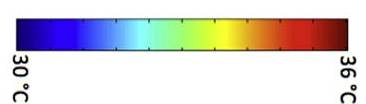

---

2.   Building Model.
   
*   First Temperature has been split into 3 parts for convenience, then converted to RGB data frame & temperature values.
* Then dataframe is split into Train & Test.
* With the help of Linear Regression prediction has been done. 

---

3. Inference of the Model.
* Heat map is given as input to the model which is converted into RGB values.
* RGB values are given as input to the Linera Regeression model & Temperature is predicted.
* If the temperature is beyond the limit, that person could be Covid suspect.




In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import cv2

In [2]:
imgscaleblue = cv2.imread('/content/drive/My Drive/Trail_Data/Blue3.jpg')
imgscalegreen = cv2.imread('/content/drive/My Drive/Trail_Data/Green3.jpg')
imgscalered = cv2.imread('/content/drive/My Drive/Trail_Data/Red4.jpg')

In [3]:
img_red1 = imgscaleblue[ :, :, 2]                         # img_red will have red values
img_blue1 = imgscaleblue[ :, :, 0]
img_green1 = imgscaleblue[ :, :, 1]                                # Similarly change 2 to 0 and 1 to get blue and green values
print(img_red1)

[[ 20  24  22 ...  21  20  22]
 [ 20  24  22 ...  21  21  22]
 [ 20  24  22 ...  22  22  23]
 ...
 [ 97  96  95 ...  97  98  98]
 [102 100  99 ...  99  95  97]
 [102 102  99 ... 102  93  73]]


In [4]:
red1= img_red1.reshape(2325,1)
green1= img_green1.reshape(2325,1)
blue1 = img_blue1.reshape(2325,1)
red1.shape

(2325, 1)

In [5]:
blue1.shape

(2325, 1)

In [6]:
green1.shape

(2325, 1)

In [7]:
rl = list(red1)

In [8]:
gl = list(green1)
bl = list(blue1)
# np.squeeze(red).shape
# np.squeeze(green).shape
# np.squeeze(blue).shape

In [9]:
x = np.arange(2325)
data={'Red':rl, 'Green':gl,'Blue':bl}
df=pd.DataFrame(data, index=x)

In [10]:
df

,Red,Green,Blue
0,[20],[1],[126]
1,[24],[5],[130]
2,[22],[3],[131]
3,[20],[1],[129]
4,[22],[1],[132]
...,...,...,...
2320,[100],[156],[251]
2321,[102],[158],[251]
2322,[102],[157],[250]
2323,[93],[148],[239]


In [11]:
df['Red'] = df['Red'].str[0]   #Removes [] from observation

In [12]:
df['Green'] = df['Green'].str[0]
df['Blue'] = df['Blue'].str[0]

In [13]:
df

,Red,Green,Blue
0,20,1,126
1,24,5,130
2,22,3,131
3,20,1,129
4,22,1,132
...,...,...,...
2320,100,156,251
2321,102,158,251
2322,102,157,250
2323,93,148,239


In [14]:
temp1 = np.arange(30,31.8,0.0007742)

In [15]:
temp1.shape

(2325,)

In [16]:
df['Temperature'] = temp1

In [17]:
df

,Red,Green,Blue,Temperature
0,20,1,126,30.000000
1,24,5,130,30.000774
2,22,3,131,30.001548
3,20,1,129,30.002323
4,22,1,132,30.003097
...,...,...,...,...
2320,100,156,251,31.796144
2321,102,158,251,31.796918
2322,102,157,250,31.797692
2323,93,148,239,31.798467


**Creating Data Points from Image 2**

In [18]:
img_red2 = imgscalegreen[ :, :, 2]                         # img_red will have red values
img_blue2 = imgscalegreen[ :, :, 0]
img_green2 = imgscalegreen[ :, :, 1]                                # Similarly change 2 to 0 and 1 to get blue and green values
img_red2.shape

(98, 24)

In [19]:
red2= img_red2.reshape(2352,1)
green2= img_green2.reshape(2352,1)
blue2 = img_blue2.reshape(2352,1)
red2.shape

(2352, 1)

In [20]:
r2 = list(red2)
g2 = list(green2)
b2 = list(blue2)

In [21]:
x2 = np.arange(2352)
data2={'Red':r2, 'Green':g2,'Blue':b2}
df2=pd.DataFrame(data2, index=x2)

In [22]:
df2

,Red,Green,Blue
0,[107],[177],[247]
1,[101],[171],[241]
2,[98],[170],[242]
3,[99],[171],[243]
4,[99],[173],[246]
...,...,...,...
2347,[232],[254],[55]
2348,[228],[250],[54]
2349,[233],[255],[59]
2350,[236],[255],[66]


In [23]:
df2['Red'] = df2['Red'].str[0]   #Removes [] from observation
df2['Green'] = df2['Green'].str[0]
df2['Blue'] = df2['Blue'].str[0]

In [24]:
df2

,Red,Green,Blue
0,107,177,247
1,101,171,241
2,98,170,242
3,99,171,243
4,99,173,246
...,...,...,...
2347,232,254,55
2348,228,250,54
2349,233,255,59
2350,236,255,66


In [25]:
temp2 = np.arange(31.8,33.6,0.0007655)
temp2.shape

(2352,)

In [26]:
df2['Temperature'] = temp2
df2

,Red,Green,Blue,Temperature
0,107,177,247,31.800000
1,101,171,241,31.800766
2,98,170,242,31.801531
3,99,171,243,31.802297
4,99,173,246,31.803062
...,...,...,...,...
2347,232,254,55,33.596628
2348,228,250,54,33.597394
2349,233,255,59,33.598159
2350,236,255,66,33.598925


***Creating Data Points from Image 3***

In [27]:
img_red3 = imgscalered[ :, :, 2]                         # img_red will have red values
img_blue3 = imgscalered[ :, :, 0]
img_green3 = imgscalered[ :, :, 1]                                # Similarly change 2 to 0 and 1 to get blue and green values
img_red3.shape

(127, 23)

In [28]:
red3= img_red3.reshape(2921,1)
green3= img_green3.reshape(2921,1)
blue3 = img_blue3.reshape(2921,1)
red3.shape

(2921, 1)

In [29]:
r3 = list(red3)
g3 = list(green3)
b3 = list(blue3)

In [30]:
x3 = np.arange(2921)
data3 ={'Red':r3, 'Green':g3,'Blue':b3}
df3=pd.DataFrame(data3, index=x3)

In [31]:
df3['Red'] = df3['Red'].str[0]   #Removes [] from observation
df3['Green'] = df3['Green'].str[0]
df3['Blue'] = df3['Blue'].str[0]

In [32]:
temp3 = np.arange(33.6,36,0.0008219)
temp3.shape

(2921,)

In [33]:
df3['Temperature'] = temp3
df3

,Red,Green,Blue,Temperature
0,240,249,44,33.600000
1,242,251,46,33.600822
2,245,254,49,33.601644
3,245,254,49,33.602466
4,244,253,48,33.603288
...,...,...,...,...
2916,88,18,16,35.996660
2917,88,18,16,35.997482
2918,88,18,16,35.998304
2919,88,18,16,35.999126


In [34]:
dm1= pd.concat([df,df2,df3], axis =0, ignore_index=True)
dm1                                                             #Final Data set

,Red,Green,Blue,Temperature
0,20,1,126,30.000000
1,24,5,130,30.000774
2,22,3,131,30.001548
3,20,1,129,30.002323
4,22,1,132,30.003097
...,...,...,...,...
7593,88,18,16,35.996660
7594,88,18,16,35.997482
7595,88,18,16,35.998304
7596,88,18,16,35.999126


In [35]:
dm1.to_csv('TempData.csv')

In [39]:
X = dm1.drop(['Temperature'], axis = 1, inplace = False)
y = dm1['Temperature']

In [46]:
x.shape, y.shape

((2325,), (7598,))

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 10)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5698, 3) (1900, 3) (5698,) (1900,)


In [51]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
y_pred = regressor.predict(X_test)
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_predict

,Actual,Predicted
1446,31.119493,31.116203
7536,35.949812,33.811508
4154,33.200099,33.515640
7297,35.753378,34.132930
4936,33.812872,34.665753
...,...,...
2822,32.180453,31.493146
850,30.658070,31.136398
6115,34.781892,34.896855
5771,34.499159,34.863308


In [53]:
r2_score(y_test, y_pred)

0.8004763603906478